In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
from sql_functions import get_dataframe

In [3]:
etfs_sql = 'SELECT * FROM public.etf_esg_merged_final_final'

etfs = get_dataframe(etfs_sql)

In [4]:
etfs.segment.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2183 entries, 0 to 2182
Series name: segment
Non-Null Count  Dtype 
--------------  ----- 
2183 non-null   object
dtypes: object(1)
memory usage: 17.2+ KB


In [5]:
etfs.segment.astype(str)

0                      Equity: U.S.  -  Large Cap
1                      Equity: U.S.  -  Large Cap
2                      Equity: U.S.  -  Large Cap
3                   Equity: U.S.  -  Total Market
4                      Equity: U.S.  -  Large Cap
                          ...                    
2178                      Equity: Global Consumer
2179    Asset Allocation: Global - Target Outcome
2180                Equity: U.S.  -  Total Market
2181              Equity: Russia  -  Total Market
2182                      Equity: Global Internet
Name: segment, Length: 2183, dtype: object

In [6]:
etfs[['mainsegment', 'subsegment']] = etfs.segment.str.split(':', expand=True)


In [7]:
etf_1 = etfs.iloc[:, [0,1,-2,-1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]

In [8]:
etf_1.drop(['segment','sustainable_impact_exposure', 'score_peer_rank'], axis=1, inplace=True)

/var/folders/n7/lhd2kpwd4bn2d3c6l8h4hzsr0000gn/T/ipykernel_16041/3564925083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_1.drop(['segment','sustainable_impact_exposure', 'score_peer_rank'], axis=1, inplace=True)


In [11]:
etf_1.head(5)

,ticker,fund_name,mainsegment,subsegment,one_yr_return,expense_ratio,aum,analyst_pick,grade,efficiency,...,p_five_yr,p_ten_yr,p_as_of_date,esg_rating,quality_score_10,score_global_rank,sri_screening_criteria_exposure_%,carbon_intensity,mainsegment,subsegment
0,SPY,SPDR S&P 500 ETF Trust,Equity,U.S. - Large Cap,17.03,0.09,4.259800e+11,True,A,99.0,...,11.79,12.48,2023-07-25,A,6.68,58.71,9.75,122.31,Equity,U.S. - Large Cap
1,IVV,iShares Core S&P 500 ETF,Equity,U.S. - Large Cap,17.08,0.03,3.516200e+11,True,A,100.0,...,11.82,12.54,2023-07-25,A,6.68,58.67,9.67,122.41,Equity,U.S. - Large Cap
2,VOO,Vanguard 500 Index Fund,Equity,U.S. - Large Cap,17.09,0.03,3.363100e+11,True,A,99.0,...,11.82,12.55,2023-07-25,A,6.68,58.75,9.76,122.47,Equity,U.S. - Large Cap
3,VTI,Vanguard Total Stock Market ETF,Equity,U.S. - Total Market,16.46,0.03,3.196800e+11,True,A,99.0,...,10.98,11.98,2023-07-25,A,6.52,52.51,8.86,122.61,Equity,U.S. - Total Market
4,QQQ,Invesco QQQ Trust,Equity,U.S. - Large Cap,27.05,0.20,2.093000e+11,True,A,97.0,...,16.50,18.66,2023-07-25,A,6.70,59.94,8.36,47.01,Equity,U.S. - Large Cap


In [15]:
Options = ['Leveraged Equity', 'Inverse Equity']

# Filtering the DataFrame
etf_1.iloc[~etf_1['mainsegment'].isin(Options)]
etf_1.drop(inplace= True, axis= 0)



IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.

In [ ]:
etf_1.head(10)

<Axes: >

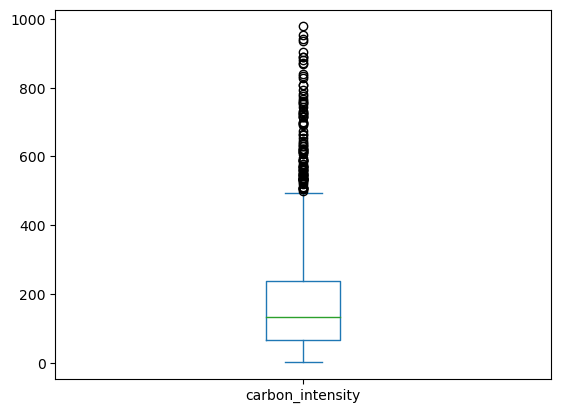

In [16]:
etfs.carbon_intensity.plot(kind='box')